# DSCI 512 Lecture 1: Complexity

- Code demos 
- Time complexity 
- Big O
- Space complexity
- True/False questions

## Code demos

#### Demo 1: searching (list vs. set)

- Is a certain value present in a collection of items?

In [4]:
n = 10000000
x = list(range(n))

In [5]:
-1 in x

False

In [6]:
%timeit (-1 in x)

103 ms ± 3.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
x = set(range(n))

In [91]:
-1 in x

False

In [92]:
%timeit (-1 in x)

39.2 ns ± 2.25 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


How could I have predicted this outcome?

Note: we were cheating a little bit, because _creating_ the set takes longer than creating the list. However, as we can see, it's still fast.

#### Demo 2: sorting (insertion vs. quick)

In [7]:
n = 10000
x = list(range(n))

In [8]:
np.random.shuffle(x)

NameError: name 'np' is not defined

In [9]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [96]:
# We will revisit this code next lecture

def insertion_sort(x):
    '''sorts x by iterative finding the smallest value and moving it to the front of the list'''
    n = len(x)
    for i in range(n):
        # Get the index of the smallest value from location i onward
        min_ind = i
        for j in range(i+1, n):
            if x[j] < x[min_ind]:
                min_ind = j
        # move it to i
        x[i], x[min_ind] = x[min_ind], x[i]
    return x

In [97]:
insertion_sort(x)
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [98]:
np.random.shuffle(x)
%timeit -r1 -n1 insertion_sort(x)

4.06 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [99]:
np.random.shuffle(x)
x.sort()

In [100]:
x[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [101]:
np.random.shuffle(x)
%timeit -r1 -n1 x.sort()

2.44 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


How could I have predicted this outcome?

#### Demo 3: batch operations (loop vs. vectorized)

In [102]:
n = 10000000
x = np.random.rand(n)
y = np.zeros(n)

In [103]:
x[:10]

array([0.51522312, 0.90093835, 0.87627316, 0.54391901, 0.31663761,
       0.26942198, 0.44498055, 0.39775507, 0.78244389, 0.73732709])

In [104]:
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [105]:
for i in range(n):
    y[i] = x[i] * 2

In [106]:
y[:10]

array([1.03044625, 1.8018767 , 1.75254632, 1.08783802, 0.63327521,
       0.53884397, 0.88996111, 0.79551015, 1.56488778, 1.47465419])

In [107]:
%%timeit -r1 -n1
for i in range(n):
    y[i] = x[i] * 2

4.03 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [108]:
y = np.zeros(n)

In [109]:
y = x * 2

In [110]:
y[:10]

array([1.03044625, 1.8018767 , 1.75254632, 1.08783802, 0.63327521,
       0.53884397, 0.88996111, 0.79551015, 1.56488778, 1.47465419])

In [111]:
%timeit -r1 -n1 y = x * 2

37.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


- How could I have predicted this outcome?

## Time complexity

- There are many factors here, one of them is the *complexity* of the algorithm
- We need a language for talking about how fast an algorithm is, in terms of the input size $n$.
- For now, let's ask ourselves: "if we double $n$, what happens to the number of steps?"

#### Examples from the above demos

For each of the following, what happens to the runtime if we double $n$?

- Finding whether a number is in a list.
- Finding whether a number is in a set.
- Sorting with my code.
- Sorting with `sort`.
- Doubling with a loop.
- Doubling with numpy.
  


## Big O

- We will formalize time complexity using _Big O notation_. 
  - In addition to $O$, there is also $o$, $\omega$, $\Omega$, $\theta$, $\Theta$, and more. But Big O is the most common and we'll only discuss Big O.
  - We will not go into the mathematical details but if you're interested, you can read about it online (e.g. the [Wikipedia article](https://en.wikipedia.org/wiki/Big_O_notation)).
- The Big O tells us the **approximate number of steps** an algorithm performs **as a function of the input size** (i.e. $n$ above).


#### Common runtimes

- For example, if doubling $n$ causing the runtime to change 4x, then we say the complexity is $O(n^2)$
  - The function $f(n)=n^2$ has the property that $f(2n)=4f(n)$


| Big O  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |  name  | change in runtime if I double $n$? |
|-------|--------|-------|
| $O(1)$ | constant | same |
| $O(\log n)$ | logarithmic | increased by a constant |
| $O(n)$ | linear | 2x | 
| $O(n \log n)$ | linearithmic | roughly 2x | 
| $O(n^2)$ | quadratic | 4x |
| $O(n^3)$ | cubic | 8x |
| $O(n^k)$ | polynomial | increase by a factor of $2^k$ | 
| $O(2^n)$ | exponential | squared |

- The exponential case is so bad that we just use the same name, "exponential" for a lot of cases, like $O(3^n),O(k^n),O(n!)$, etc
- For $O(2^n)$, increasing $n$ by 1 causes the runtime to double!

#### Back to the examples from earlier

For each of the following, what is the time complexity in Big O notation?

- Finding whether a number is in a list: <span style="background-color:black;"> $O(n)$ </span>
- Finding whether a number is in a set: <span style="background-color:black;"> $O(1)$ </span>
- Sorting with my code:<span style="background-color:black;"> $O(n^2)$ </span>
- Sorting with `sort`:<span style="background-color:black;"> $O(n \log n)$ </span>
- Doubling with a loop: <span style="background-color:black;">  $O(n)$ </span>
- Doubling with numpy: <span style="background-color:black;">$O(n)$ </span>
  

#### Plotting runtimes

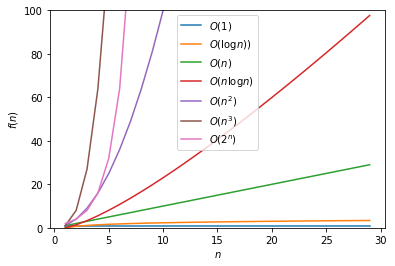

In [114]:
n = np.arange(1,30)
plt.plot(n, 0*n+1, label="$O(1)$")
plt.plot(n, np.log(n), label="$O(\log n))$")
plt.plot(n, n, label="$O(n)$")
plt.plot(n, n*np.log(n), label="$O(n \log n)$")
plt.plot(n, n**2., label="$O(n^2)$")
plt.plot(n, n**3., label="$O(n^3)$")
plt.plot(n, 2.**n, label="$O(2^n)$")
plt.ylim(0,100)
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend();

It is also common to look at log-log plots:

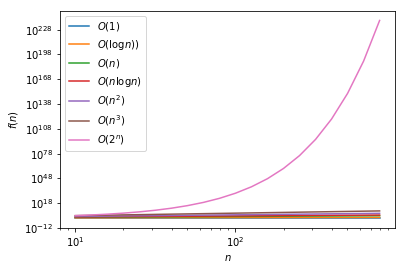

In [115]:
n = 10.0**np.arange(1,3,0.1)
plt.loglog(n, 0*n+1, label="$O(1)$")
plt.loglog(n, np.log(n), label="$O(\log n))$")
plt.loglog(n, n, label="$O(n)$")
plt.loglog(n, n*np.log(n), label="$O(n \log n)$")
plt.loglog(n, n**2., label="$O(n^2)$")
plt.loglog(n, n**3., label="$O(n^3)$")
plt.loglog(n, 2.**n, label="$O(2^n)$")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend();

Above: exponential is _BAD_! Removing that curve...

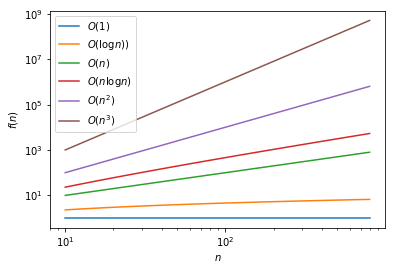

In [116]:
n = 10.0**np.arange(1,3,0.1)
plt.loglog(n, 0*n+1, label="$O(1)$")
plt.loglog(n, np.log(n), label="$O(\log n))$")
plt.loglog(n, n, label="$O(n)$")
plt.loglog(n, n*np.log(n), label="$O(n \log n)$")
plt.loglog(n, n**2., label="$O(n^2)$")
plt.loglog(n, n**3., label="$O(n^3)$")
# plt.loglog(n, 2.**n, label="$O(2^n)$")
plt.xlabel('$n$')
plt.ylabel('$f(n)$')
plt.legend();

In log-log plots, polynomials turn into straight lines, with slope equal to the exponent.

#### Constant factors are not included in Big-O

- In Big O notation, we ignore constants.
  - If an algorithm takes $2n + 1$ steps, we write $O(n)$, not $O(2n + 1$).
  - We're interested in the big picture, not the details.
- This can be misleading at times.
  - Is code that runs in $O(\log n)$ time faster than code that runs in $O(n)$ time?
  - Not always! It depends on the constants.
  - You will see an example of this phenomenon in lab 2.
- What affects the Big O?
  - Typically, just the algorithm.
- What affects the constant?
  - The algorithm.
    - Does it take $n$ steps or $2n$ steps or $100000n$ steps?
    - How complicated is each step?
  - The _implementation_.
    - How fast is your programming language?
    - How fast are your libraries (e.g. Numpy)?
    - How fast is your laptop?
    - Is there an opportunity for parallel computation?
- The implementation issues are quite complicated. You may need to experiment!

#### What if the number of steps depends on the kind of input rather than just its size?

- We'll see some examples of this later in the course
- Usually Big O is an upper bound: generally, think of the worse case scenario

## Space complexity

- If code takes too long to run, that might be a problem.
- Another possible problem is running out of memory.
  - Note: this is NOT the same as "disk space".

In [30]:
import psutil
psutil.virtual_memory()

svmem(total=17033633792, available=8197791744, percent=51.9, used=8835842048, free=8197791744)

- Apparently I have about 16 GB of RAM.
- A number typically takes up 8 bytes, so I can store around 2 billion numbers.
  - Actually less, because I have other stuff going on, not just Python.
  - Plus, there's overhead from within Python.
- If my code needs to store 2 billion numbers _at the same time_, I can't run it on my laptop. 
- We also analyze space complexity using Big O notation.


- With _time complexity_, we tend to think more about the _algorithms_.
- With _space complexity_, we tend to think more about the _data structures_.

Example 1:

```python
x = np.zeros(5)
```


Space complexity: <span style="background-color:black;">$O(1)$</span>

Example 2:

```python
x = np.zeros(n)
```

Space complexity: <span style="background-color:black;">$O(n)$</span>

Example 3:

```python
x = np.zeros((n,n))
```

Space complexity: <span style="background-color:black;">$O(n^2)$</span>

Example 4:

```python
x = zeros((n,n,5))
```

Space complexity: <span style="background-color:black;">$O(n^2)$</span>

Example 5:

```python
x = zeros((n,n,n))
```

Space complexity: <span style="background-color:black;">$O(n^3)$</span>

Example 6: 

You have $n$ users on your social network site, and you want to store a "level of friendship" between every pair of users.

Space complexity: <span style="background-color:black;">$O(n^2)$</span>

Example 7:

You have $n$ users on your social network site, and you want to store who is friends with who.

Space complexity: <span style="background-color:black;">it depends! If each user only has a constant (independent of $n$) number of friends, then $O(n)$. But in the worst case it could be $O(n^2)$.</span>

So, can we check how much space a particular python object is taking up in memory? Yup, with sys.getsizeof. Let's check the size of some basic Python datatypes.

In [33]:
from sys import getsizeof

In [36]:
getsizeof(100)

28

In [35]:
getsizeof(1.5)

24

In [37]:
getsizeof("hello")

54

In [38]:
getsizeof("hello world")

60

In [39]:
getsizeof("")

49

Since everything in Python is actually a full-fledged object, there's a surprising amount of basic overhead for even basic datatypes. One reason to prefer data structures like numpy arrays is that they eliminate much of this overhead.

Now let's look at lists.

In [40]:
getsizeof([])

64

In [44]:
getsizeof([1])

72

In [41]:
getsizeof([1,2])

80

In [42]:
getsizeof(["hello","goodbye"])

80

In [43]:
getsizeof(["hello world","goodbye world"])

80

We can see from this getsizeof only gives you the size of the container, not the contents. To get the total size in this simple case, we can loop, though for more complex data structures, recursion is recommended.

In [45]:
L =  ["hello world","goodbye world"]
# my code here
total = 0
total += getsizeof(L)
for S in L:
    total += getsizeof(L)

print(total)
# my code here

240


A final deflating (or perhaps encouraging?) note: for many of the basic Python scripts one writes, particularly those involving offline data manipulation, it's not worth getting too worked up about how much time or space is being used.

Of course, all things being equal you should always prefer to write efficient code, but if the expected $n$ is low enough and/or the code isn't going to be run often, trying to improve time/space complexity might be a waste of *your* valuable time and memory!

## True/False questions

Assume Algorithm A runs in $O(n)$ time and Algorithm B runs in $O\left(\sqrt{n}\right)$ time.

1. Running Algorithm A will take longer than running Algorithm B.
2. Running Algorithm A with $n=20000$ will probably take 2x as long as running it with $n=10000$.
3. Running Algorithm A with $n=2$ will probably take 2x as long as running it with $n=1$.
4. Running Algorithm B with $n=20000$ will probably take 4x as long as running it with $n=10000$.
5. If Algorithm B is the best algorithm for a given task, then there is no way to further speed up one's code.
6. To get the total memory used by an instance of a class, it is sufficient to call getsizeof on all the Python objects contained in self